In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import datasets
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv('download (4).csv')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
instr         500 non-null int64
class         500 non-null int64
nb.repeat     500 non-null int64
attendance    500 non-null int64
difficulty    500 non-null int64
Q1            500 non-null int64
Q2            500 non-null int64
Q3            500 non-null int64
Q4            500 non-null int64
Q5            500 non-null int64
Q6            500 non-null int64
Q7            500 non-null int64
Q8            500 non-null int64
Q9            500 non-null int64
Q10           500 non-null int64
Q11           500 non-null int64
Q12           500 non-null int64
Q13           500 non-null int64
Q14           500 non-null int64
Q15           500 non-null int64
Q16           500 non-null int64
Q17           500 non-null int64
Q18           500 non-null int64
Q19           500 non-null int64
Q20           500 non-null int64
Q21           500 non-null int64
Q22           500 non-null int64
Q23 

In [8]:
data.shape

(500, 33)

In [9]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,8,1,0,1,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,3,8,1,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,13,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,5,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,3,3,1,3,4,2,2,4,2,3,...,4,4,3,4,3,3,3,3,2,4


In [10]:
data.instr.value_counts()

3    324
2    118
1     58
Name: instr, dtype: int64

In [11]:
data.Q1.value_counts()

3    135
1    106
4     97
5     89
2     73
Name: Q1, dtype: int64

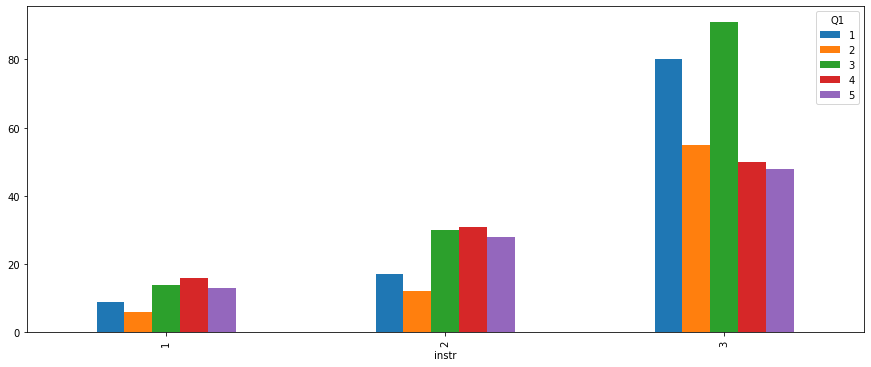

In [12]:
pd.crosstab(data.instr,data.Q1).plot(kind="bar",figsize=(15,6))

plt.show()

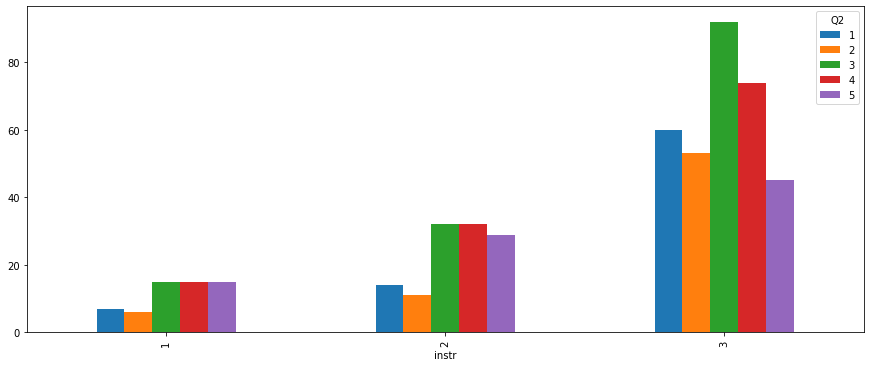

In [13]:
pd.crosstab(data.instr,data.Q2).plot(kind="bar",figsize=(15,6))

plt.show()

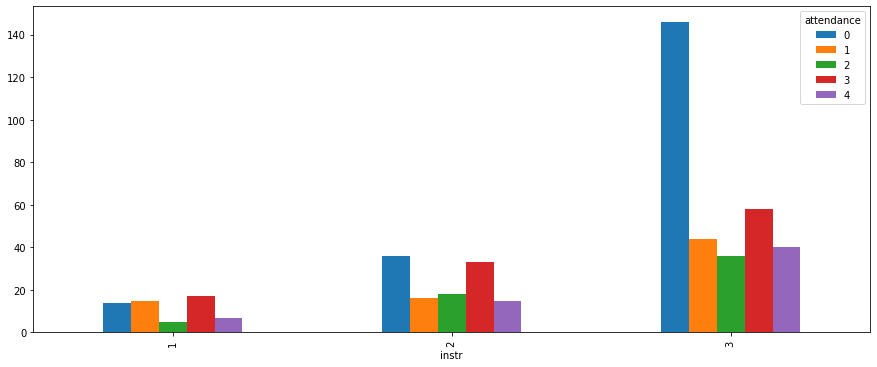

In [14]:
pd.crosstab(data.instr,data.attendance).plot(kind="bar",figsize=(15,6))

plt.show()

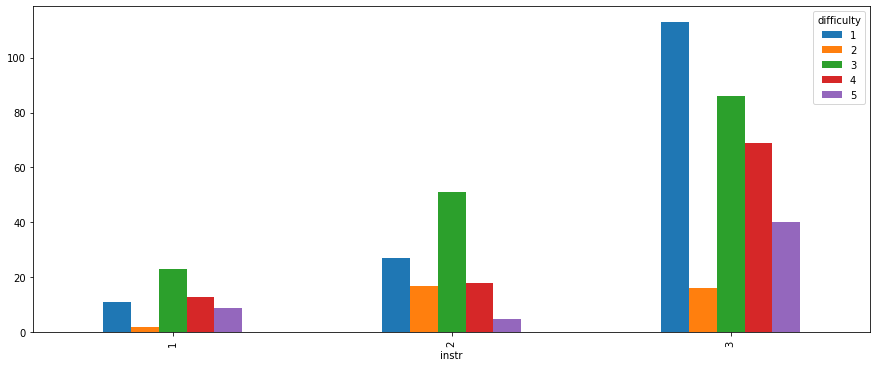

In [15]:
pd.crosstab(data.instr,data.difficulty).plot(kind="bar",figsize=(15,6))

plt.show()

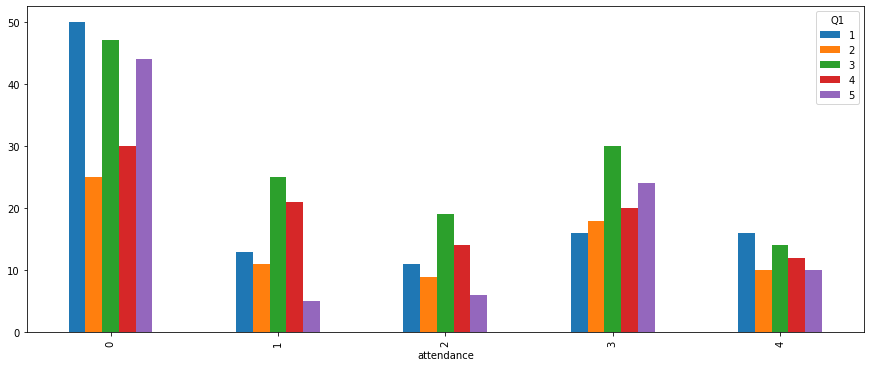

In [16]:
pd.crosstab(data.attendance,data.Q1).plot(kind="bar",figsize=(15,6))

plt.show()

In [17]:
data.attendance.value_counts()

0    196
3    108
1     75
4     62
2     59
Name: attendance, dtype: int64

In [18]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [19]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.532000,7.374000,1.214000,1.530000,2.742000,2.98000,3.134000,3.222000,3.124000,3.14400,...,3.344000,3.344000,3.362000,3.360000,3.208000,3.182000,3.348000,3.266000,3.184000,3.384000
std,0.694219,3.765432,0.533642,1.487793,1.359092,1.37964,1.314344,1.300808,1.344708,1.32165,...,1.307319,1.318005,1.297043,1.302995,1.313082,1.344802,1.316953,1.295608,1.352702,1.329692
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.00000,2.000000,2.000000,2.000000,2.00000,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,...,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000
75%,3.000000,11.000000,1.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.00000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
data.dtypes

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object

In [21]:
data.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

Generate the covariance and correlation tables for the data


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled = data.apply(zscore)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)

In [ ]:
import seaborn as sns
sns.pairplot(df_scaled,diag_kind='kde')

In [ ]:

sns.heatmap(data.cov(),annot=True)

highly correralted features are questions so we will perform pca on questions dataset

In [17]:
 
counttwo = len(data[data.instr == 2])
countone = len(data[data.instr == 1])
countthree = len(data[data.instr == 3])


print("Percentage of two instr: {:.2f}%".format((counttwo / (len(data.instr))*100)))
print("Percentage of one instr: {:.2f}%".format((countone / (len(data.instr))*100)))
print("Percentage of zero instr: {:.2f}%".format((countthree / (len(data.instr))*100)))
## For nb.repeat
counttwo = len(data[data['nb.repeat'] == 2])
countone = len(data[data['nb.repeat'] == 1])
countthree = len(data[data['nb.repeat'] == 3])


print("Percentage of two instr: {:.2f}%".format((counttwo / (len(data['nb.repeat']))*100)))
print("Percentage of one instr: {:.2f}%".format((countone / (len(data['nb.repeat']))*100)))
print("Percentage of zero instr: {:.2f}%".format((countthree / (len(data['nb.repeat']))*100)))
## For attendance
counttwo = len(data[data['attendance'] == 2])
countone = len(data[data['attendance'] == 1])
countthree = len(data[data['attendance'] == 3])
countzero = len(data[data['attendance'] == 0])
countfour = len(data[data['attendance'] == 4])


print("Percentage of two instr: {:.2f}%".format((counttwo / (len(data['attendance']))*100)))
print("Percentage of one instr: {:.2f}%".format((countone / (len(data['attendance']))*100)))
print("Percentage of three instr: {:.2f}%".format((countthree / (len(data['attendance']))*100)))
print("Percentage of zero instr: {:.2f}%".format((countzero / (len(data['attendance']))*100)))
print("Percentage of four instr: {:.2f}%".format((countfour / (len(data['attendance']))*100)))
## For difficulty
counttwo = len(data[data['difficulty'] == 2])
countone = len(data[data['difficulty'] == 1])
countthree = len(data[data['difficulty'] == 3])
countfive = len(data[data['difficulty'] == 5])
countfour = len(data[data['difficulty'] == 2])


print("Percentage of two instr: {:.2f}%".format((counttwo / (len(data['difficulty']))*100)))
print("Percentage of one instr: {:.2f}%".format((countone / (len(data['difficulty']))*100)))
print("Percentage of three instr: {:.2f}%".format((countthree / (len(data['difficulty']))*100)))
print("Percentage of five instr: {:.2f}%".format((countzero / (len(data['difficulty']))*100)))
print("Percentage of four instr: {:.2f}%".format((countfour / (len(data['difficulty']))*100)))

Percentage of two instr: 23.60%
Percentage of one instr: 11.60%
Percentage of zero instr: 64.80%
Percentage of two instr: 9.80%
Percentage of one instr: 84.40%
Percentage of zero instr: 5.80%
Percentage of two instr: 11.80%
Percentage of one instr: 15.00%
Percentage of three instr: 21.60%
Percentage of zero instr: 39.20%
Percentage of four instr: 12.40%
Percentage of two instr: 7.00%
Percentage of one instr: 30.20%
Percentage of three instr: 32.00%
Percentage of five instr: 39.20%
Percentage of four instr: 7.00%


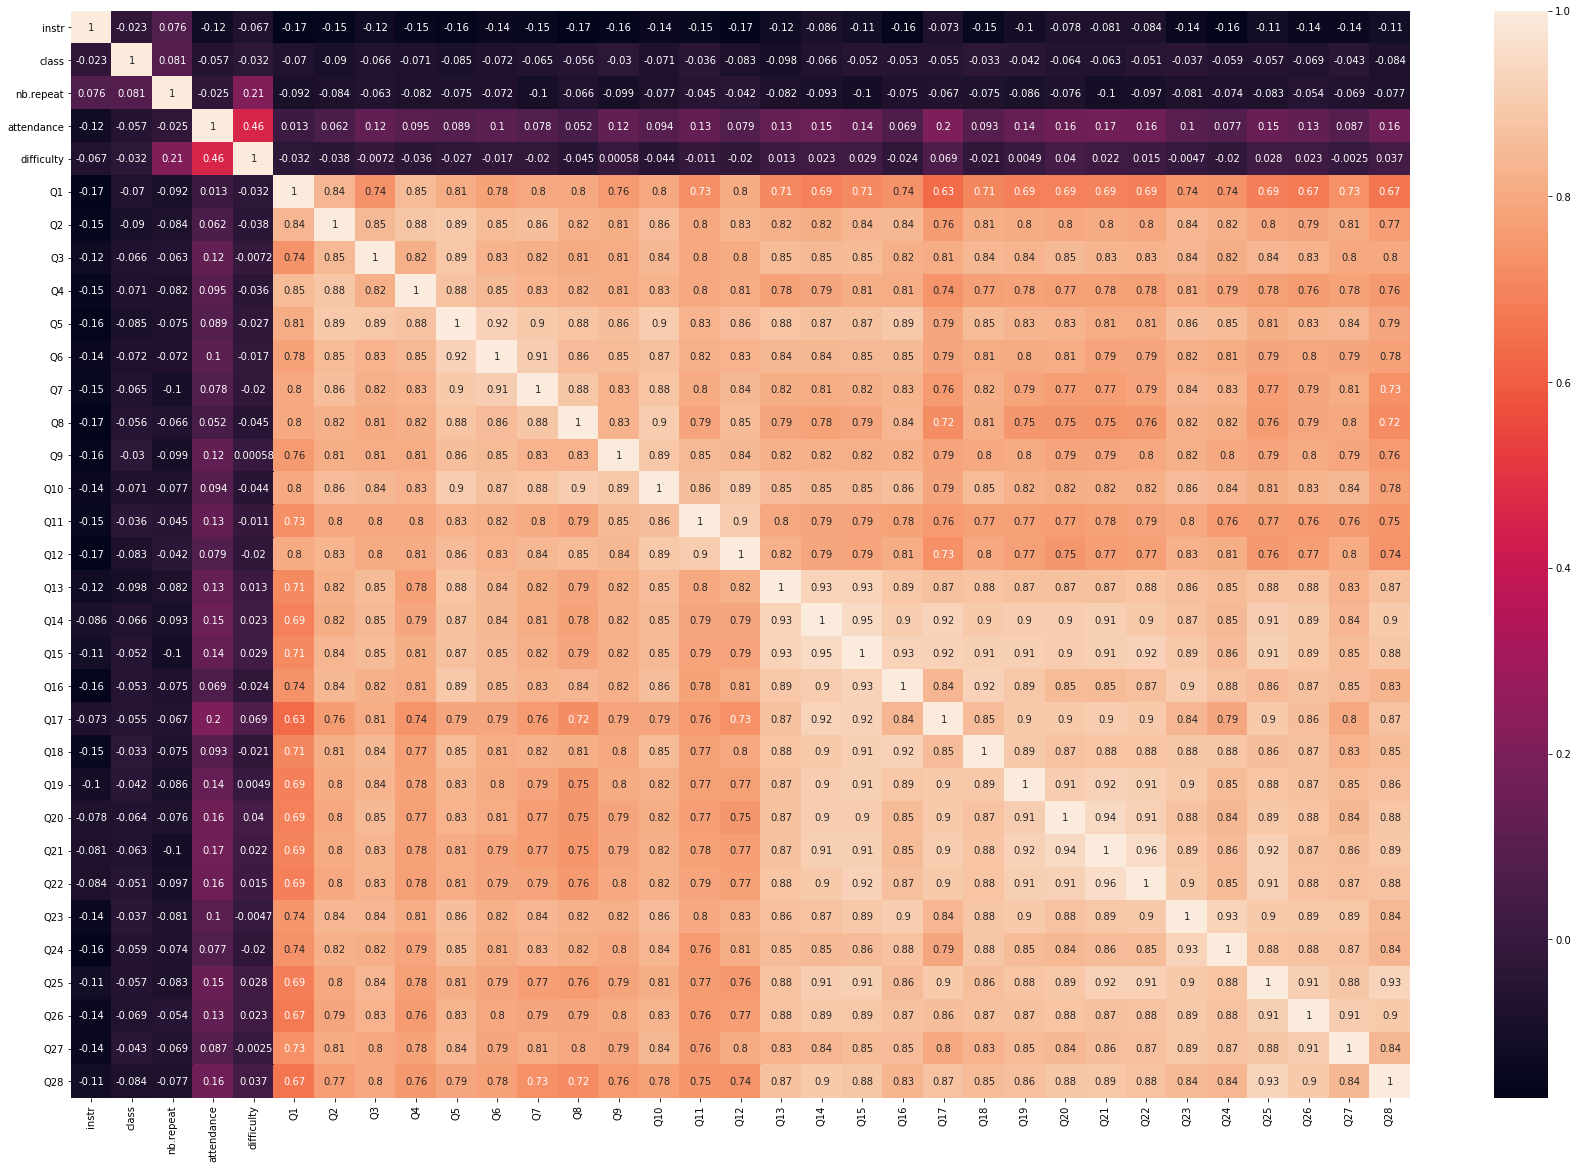

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

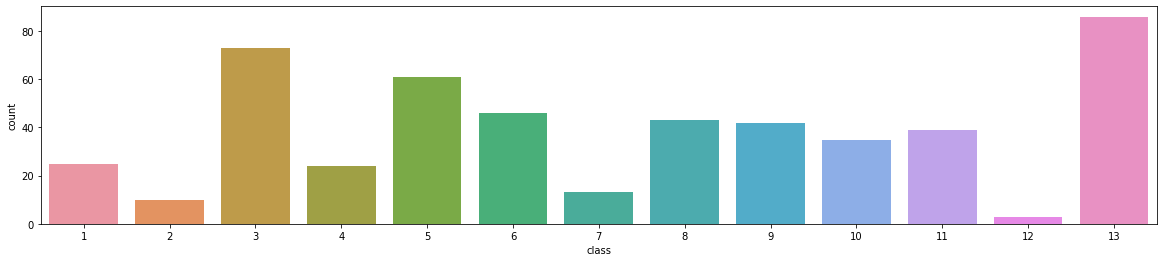

In [23]:
plt.figure(figsize=(20,4))
sns.countplot(x='class',data=data)

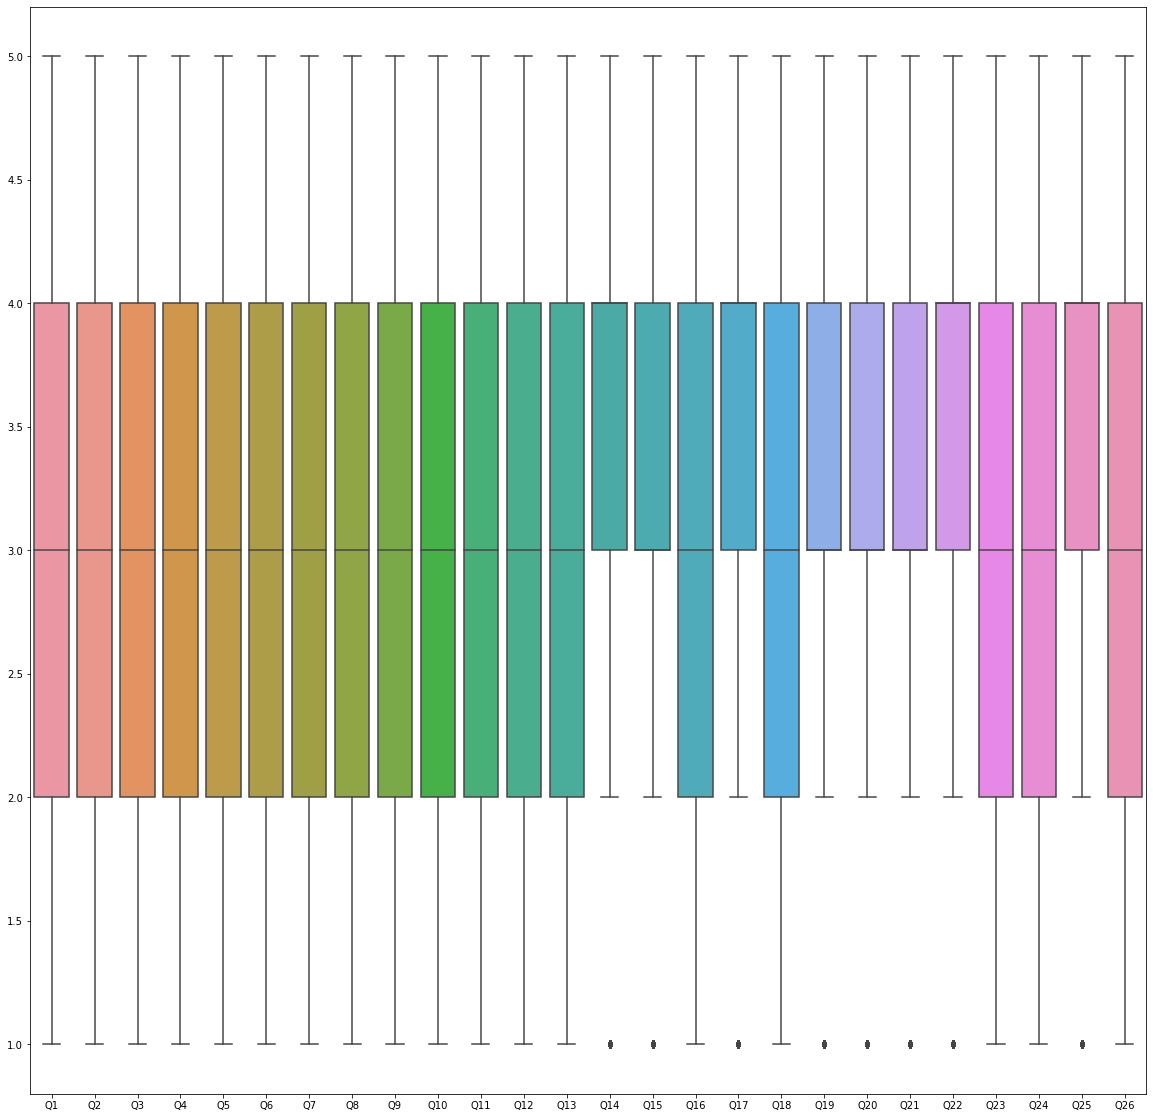

In [24]:
plt.figure(figsize=(20,20))
sns.boxplot(data=data.iloc[:,5:31])

a. Create Visualization plots to find the pattern amongst the variables.
b. Check which clustering is better suited for the data.


In [20]:
questionmeans=[]
classlist=[]
questions=[]
totalplotdata=pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns=['class','questions','mean'])
for class_num in range(1,13):
    class_data=data[(data['class']==class_num)]
    questionmeans=[]
    classlist=[]
    questions=[]
    for num in range(1,13):
        questions.append(num)
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist+=12*[class_num]
    print(classlist)
    plot_data=pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns=['class','questions','mean'])
    totalplotdata=totalplotdata.append(plot_data,ignore_index=True)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


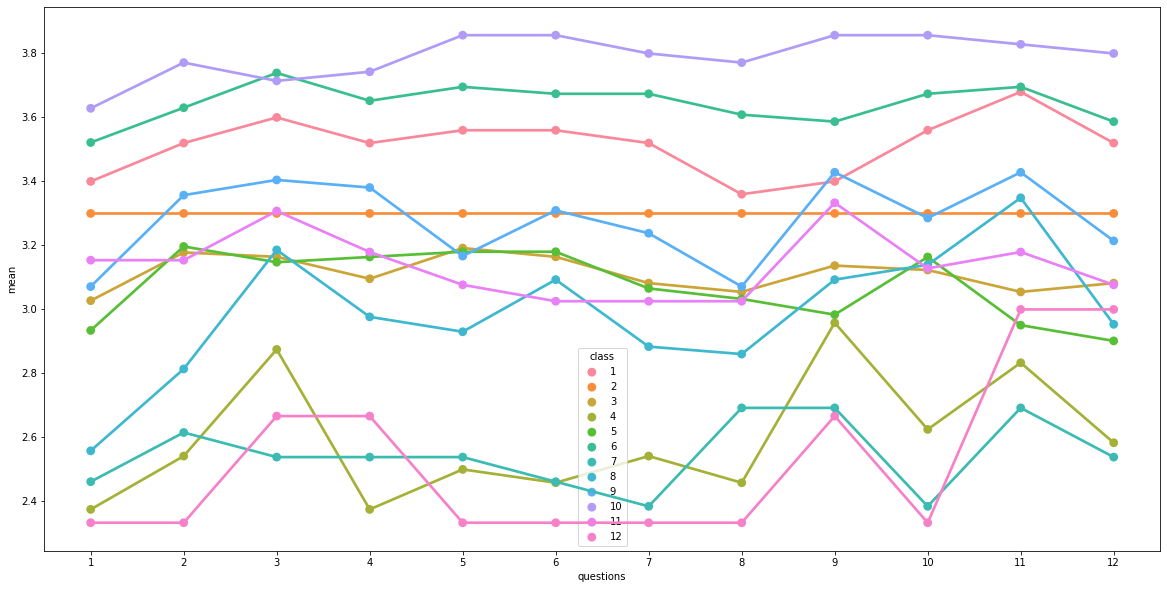

In [21]:
plt.figure(figsize=(20,10))
sns.pointplot(x='questions',y='mean',data=totalplotdata,hue='class')

In [22]:
questionmeans=[]
inslist=[]
questions=[]
totalplotdata=pd.DataFrame(list(zip(inslist,questions,questionmeans)),columns=['ins','questions','mean'])
for ins_num in range(1,4):
    ins_data=data[(data['instr']==ins_num)]
    questionmeans=[]
    inslist=[]
    questions=[]
    for num in range(13,29):
        questions.append(num)
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist+=16*[ins_num]
    print(inslist)
    plotdata=pd.DataFrame(list(zip(inslist,questions,questionmeans)),columns=['ins','questions','mean'])
    totalplotdata=totalplotdata.append(plotdata)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


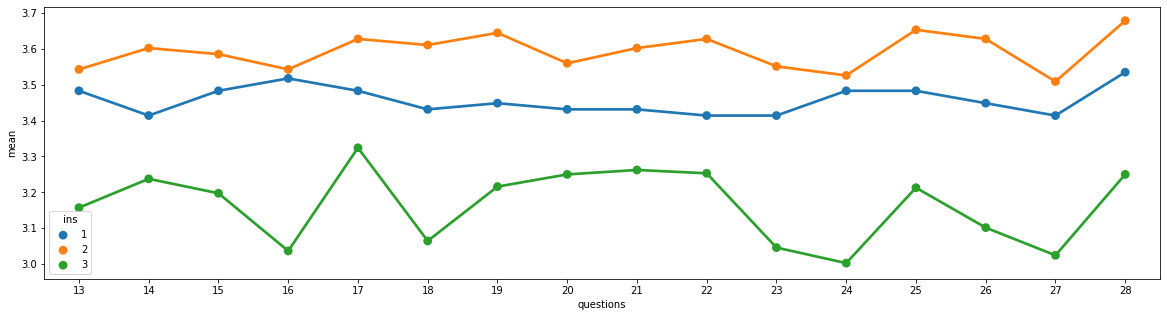

In [23]:
plt.figure(figsize=(20,5))
sns.pointplot(x='questions',y='mean',data=totalplotdata,hue='ins')


In [24]:
#calculate mean for intructor 
dataset_inst3=data[(data['instr']==3)]
class_array_for_inst3=dataset_inst3['class'].unique().tolist()
questionmeans=[]
classlist=[]
questions=[]
totalplotdata=pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns=['class','questions','mean'])
for class_num in class_array_for_inst3:
    class_data=dataset_inst3[(dataset_inst3['class']==class_num)]
    questionmeans=[]
    classlist=[]
    questions=[]
    for num in range(1,13):
        questions.append(num)
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist+=12*[class_num]
    plotdata=pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns=['class','questions','mean'])
    totalplotdata=totalplotdata.append(plotdata)

In [25]:
from sklearn.cluster import KMeans


In [26]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(data_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,16500.000000
1,2,8715.634619
2,3,6134.622216
3,4,5350.546090
4,5,4964.572287
5,6,4749.911288
6,7,4582.855542
7,8,4411.935597
8,9,4292.460647
9,10,4215.715486


In [27]:
dataset_inst3=data[(data['instr']==3)]
class_array_for_inst3=dataset_inst3['class'].unique().tolist()
questionmeans=[]
classlist=[]
questions=[]
totalplotdata=pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns=['class','questions','mean'])
for class_num in class_array_for_inst3:
    class_data=dataset_inst3[(dataset_inst3['class']==class_num)]
    questionmeans=[]
    classlist=[]
    questions=[]
    for num in range(1,13):
        questions.append(num)
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist+=12*[class_num]
    plotdata=pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns=['class','questions','mean'])
    totalplotdata=totalplotdata.append(plotdata)

In [28]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [29]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [30]:
centroids=kmeans.cluster_centers_

In [31]:
centroid_df = pd.DataFrame(centroids, columns = list(data_scaled) )

In [32]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [33]:
df_labeled = data_scaled.join(df_labels)

In [34]:
df_labeled.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels
0,0.674814,0.166416,-0.40142,-1.029399,-1.283022,1.465616,1.421142,1.368212,1.396495,1.405712,...,1.257702,1.264137,1.259899,1.366095,1.353226,1.255667,1.339708,1.343842,1.216536,1
1,0.674814,0.166416,-0.40142,1.661840,0.190023,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,...,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078,0
2,0.674814,1.495614,-0.40142,0.989030,0.190023,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,...,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078,0
3,0.674814,-0.631104,-0.40142,-1.029399,-1.283022,-1.436594,-1.625250,-1.709880,-1.581107,-1.623840,...,-1.780226,-1.822889,-1.813026,-1.683224,-1.624168,-1.784689,-1.750737,-1.616163,-1.794692,0
4,0.674814,-1.162783,-0.40142,0.989030,0.926545,-0.711042,-0.863652,0.598689,-0.836706,-0.109064,...,0.498220,-0.279376,0.491668,-0.158565,-0.135471,-0.264511,-0.205515,-0.876162,0.463729,0


In [35]:
dataset_question=data_scaled.iloc[:,5:33]


In [36]:
dataset_question.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1.465616,1.421142,1.368212,1.396495,1.405712,1.400384,1.425981,1.440442,1.394000,1.417727,...,1.267983,1.257702,1.264137,1.259899,1.366095,1.353226,1.255667,1.339708,1.343842,1.216536
1,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,-0.121773,-0.076633,-0.046082,-0.146331,-0.126638,...,-0.263398,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078
2,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,-0.121773,-0.076633,-0.046082,-0.146331,-0.126638,...,-0.263398,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078
3,-1.436594,-1.625250,-1.709880,-1.581107,-1.623840,-1.643929,-1.579248,-0.789344,-0.146331,-0.126638,...,-1.794779,-1.780226,-1.822889,-1.813026,-1.683224,-1.624168,-1.784689,-1.750737,-1.616163,-1.794692
4,-0.711042,-0.863652,0.598689,-0.836706,-0.109064,-0.121773,-0.076633,-0.789344,-0.146331,-0.126638,...,0.502293,0.498220,-0.279376,0.491668,-0.158565,-0.135471,-0.264511,-0.205515,-0.876162,0.463729


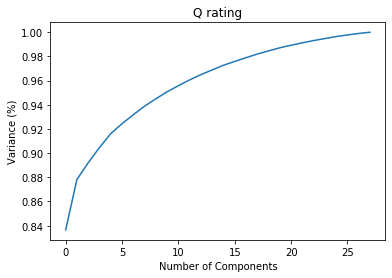

In [37]:
#Fitting the PCA algorithm
pca = PCA().fit(dataset_question)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Q rating')
plt.show()


In [38]:
#lets do pca for feature dimensional reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
dataset_questions_pca=pca.fit_transform(dataset_question)

In [39]:
dataset_questions_pca

array([[-7.10787034e+00, -4.99006152e-01, -7.01409396e-02, ...,
         2.32206265e-04,  9.89629441e-03,  6.45814548e-02],
       [ 9.21710318e-01, -4.01354775e-01, -1.21377352e-01, ...,
        -1.74125822e-02,  1.84343958e-02,  9.34116186e-03],
       [ 9.21710318e-01, -4.01354775e-01, -1.21377352e-01, ...,
        -1.74125822e-02,  1.84343958e-02,  9.34116186e-03],
       ...,
       [-2.79487109e+00, -2.20367278e+00,  1.92625188e+00, ...,
        -7.08880681e-01, -5.32942904e-01, -4.46037895e-01],
       [-7.10787034e+00, -4.99006152e-01, -7.01409396e-02, ...,
         2.32206265e-04,  9.89629441e-03,  6.45814548e-02],
       [ 9.21710318e-01, -4.01354775e-01, -1.21377352e-01, ...,
        -1.74125822e-02,  1.84343958e-02,  9.34116186e-03]])

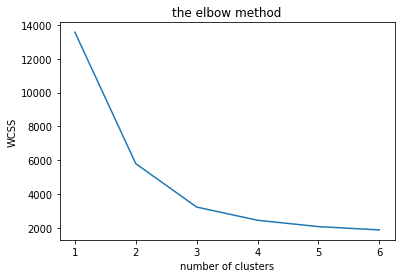

In [40]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(dataset_questions_pca)

In [42]:
import scipy.cluster.hierarchy as sch

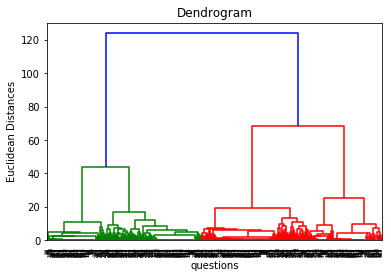

In [43]:
dendrogram=sch.dendrogram(sch.linkage(dataset_questions_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean Distances')
plt.show()

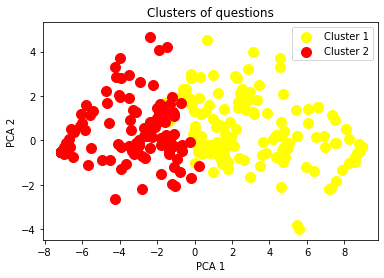

In [44]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(dataset_questions_pca)
X=dataset_questions_pca
#visualizing the cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of questions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [47]:
kmeans=KMeans(n_clusters=3)
X1=dataset_questions_pca
kmeans.fit(X1)
y1=kmeans.labels_

In [48]:
K = range(1,11)
KM = [KMeans(n_clusters=k).fit(X1) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X1, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [49]:
wc = [sum(d**2) for d in dist]
ts= sum(pdist(X1)**2)/X1.shape[0]
bs = ts-wc
varExplained = bs/ts*100

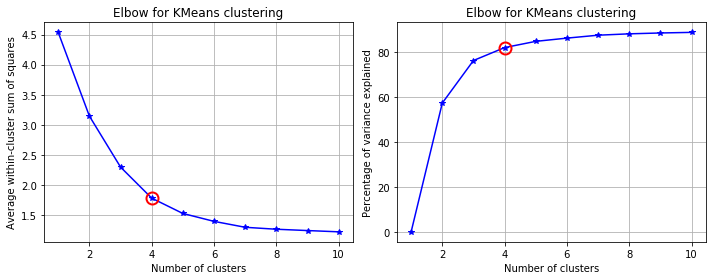

In [50]:
##### plot ###
kIdx = 3
# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

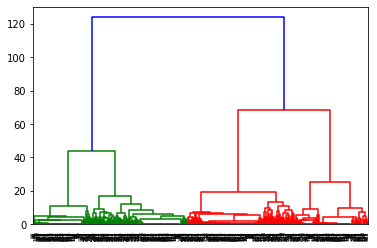

In [51]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_questions_pca, method='ward'))

In [52]:
pca_data=pd.DataFrame(dataset_questions_pca)

In [53]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-7.107870,-0.499006,-0.070141,-0.008274,0.080336,0.000816,0.004990,-0.013010,0.051081,-0.036181,-0.023586,0.000232,0.009896,0.064581
1,0.921710,-0.401355,-0.121377,-0.072069,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
2,0.921710,-0.401355,-0.121377,-0.072069,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
3,8.233557,-1.022260,0.447501,-0.782124,-0.062146,-0.153872,0.765978,0.285090,1.149235,0.574050,-0.189158,0.021516,-0.263917,-0.452860
4,-0.007136,1.307480,1.316093,-0.032827,-0.509071,0.505748,-0.671427,-0.262297,0.151539,-0.602477,-0.644931,0.037194,0.308474,0.487393


In [54]:
newdata=df_labeled.join(pca_data)

In [55]:
newdata.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,4,5,6,7,8,9,10,11,12,13
0,0.674814,0.166416,-0.40142,-1.029399,-1.283022,1.465616,1.421142,1.368212,1.396495,1.405712,...,0.080336,0.000816,0.004990,-0.013010,0.051081,-0.036181,-0.023586,0.000232,0.009896,0.064581
1,0.674814,0.166416,-0.40142,1.661840,0.190023,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,...,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
2,0.674814,1.495614,-0.40142,0.989030,0.190023,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,...,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
3,0.674814,-0.631104,-0.40142,-1.029399,-1.283022,-1.436594,-1.625250,-1.709880,-1.581107,-1.623840,...,-0.062146,-0.153872,0.765978,0.285090,1.149235,0.574050,-0.189158,0.021516,-0.263917,-0.452860
4,0.674814,-1.162783,-0.40142,0.989030,0.926545,-0.711042,-0.863652,0.598689,-0.836706,-0.109064,...,-0.509071,0.505748,-0.671427,-0.262297,0.151539,-0.602477,-0.644931,0.037194,0.308474,0.487393


In [56]:
newdata.columns

Index([     'instr',      'class',  'nb.repeat', 'attendance', 'difficulty',
               'Q1',         'Q2',         'Q3',         'Q4',         'Q5',
               'Q6',         'Q7',         'Q8',         'Q9',        'Q10',
              'Q11',        'Q12',        'Q13',        'Q14',        'Q15',
              'Q16',        'Q17',        'Q18',        'Q19',        'Q20',
              'Q21',        'Q22',        'Q23',        'Q24',        'Q25',
              'Q26',        'Q27',        'Q28',     'labels',            0,
                  1,            2,            3,            4,            5,
                  6,            7,            8,            9,           10,
                 11,           12,           13],
      dtype='object')

In [57]:
newdata1=newdata.drop(['Q1',         'Q2',         'Q3',         'Q4',         'Q5',
               'Q6',         'Q7',         'Q8',         'Q9',        'Q10',
              'Q11',        'Q12',        'Q13',        'Q14',        'Q15',
              'Q16',        'Q17',        'Q18',        'Q19',        'Q20',
              'Q21',        'Q22',        'Q23',        'Q24',        'Q25',
              'Q26',        'Q27',        'Q28'],axis=1)

In [58]:
newdata1.head()

,instr,class,nb.repeat,attendance,difficulty,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.674814,0.166416,-0.40142,-1.029399,-1.283022,1,-7.107870,-0.499006,-0.070141,-0.008274,0.080336,0.000816,0.004990,-0.013010,0.051081,-0.036181,-0.023586,0.000232,0.009896,0.064581
1,0.674814,0.166416,-0.40142,1.661840,0.190023,0,0.921710,-0.401355,-0.121377,-0.072069,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
2,0.674814,1.495614,-0.40142,0.989030,0.190023,0,0.921710,-0.401355,-0.121377,-0.072069,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
3,0.674814,-0.631104,-0.40142,-1.029399,-1.283022,0,8.233557,-1.022260,0.447501,-0.782124,-0.062146,-0.153872,0.765978,0.285090,1.149235,0.574050,-0.189158,0.021516,-0.263917,-0.452860
4,0.674814,-1.162783,-0.40142,0.989030,0.926545,0,-0.007136,1.307480,1.316093,-0.032827,-0.509071,0.505748,-0.671427,-0.262297,0.151539,-0.602477,-0.644931,0.037194,0.308474,0.487393


In [59]:
dataset_questions_pca=pd.DataFrame(dataset_questions_pca)

In [60]:
dataset_questions_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-7.107870,-0.499006,-0.070141,-0.008274,0.080336,0.000816,0.004990,-0.013010,0.051081,-0.036181,-0.023586,0.000232,0.009896,0.064581
1,0.921710,-0.401355,-0.121377,-0.072069,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
2,0.921710,-0.401355,-0.121377,-0.072069,-0.001250,0.026345,-0.020359,-0.017752,0.004874,-0.002111,-0.002045,-0.017413,0.018434,0.009341
3,8.233557,-1.022260,0.447501,-0.782124,-0.062146,-0.153872,0.765978,0.285090,1.149235,0.574050,-0.189158,0.021516,-0.263917,-0.452860
4,-0.007136,1.307480,1.316093,-0.032827,-0.509071,0.505748,-0.671427,-0.262297,0.151539,-0.602477,-0.644931,0.037194,0.308474,0.487393


In [128]:
dataset_question.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1.465616,1.421142,1.368212,1.396495,1.405712,1.400384,1.425981,1.440442,1.394000,1.417727,...,1.267983,1.257702,1.264137,1.259899,1.366095,1.353226,1.255667,1.339708,1.343842,1.216536
1,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,-0.121773,-0.076633,-0.046082,-0.146331,-0.126638,...,-0.263398,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078
2,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,-0.121773,-0.076633,-0.046082,-0.146331,-0.126638,...,-0.263398,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078
3,-1.436594,-1.625250,-1.709880,-1.581107,-1.623840,-1.643929,-1.579248,-0.789344,-0.146331,-0.126638,...,-1.794779,-1.780226,-1.822889,-1.813026,-1.683224,-1.624168,-1.784689,-1.750737,-1.616163,-1.794692
4,-0.711042,-0.863652,0.598689,-0.836706,-0.109064,-0.121773,-0.076633,-0.789344,-0.146331,-0.126638,...,0.502293,0.498220,-0.279376,0.491668,-0.158565,-0.135471,-0.264511,-0.205515,-0.876162,0.463729


In [129]:
#withput pca

In [61]:
from sklearn.model_selection import train_test_split
x = df_labeled.drop(['labels'],axis=1)
y = df_labeled['labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [62]:
def Models(x_train,y_train,x_test,y_test):
    
    x_train=x_train
    y_train=y_train
    x_test=x_test
    y_test=y_test

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB, MultinomialNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC


    
    print("LOGISTIC REGRESSION")
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    ypred = lg.predict(x_test)
    confusion_matrix = confusion_matrix(y_test, ypred)
    print("Confusion matrix for Logistic:",confusion_matrix)
    accuracy_score = accuracy_score(y_test, ypred)
    print("Accuracy score for Logistic:",accuracy_score)
    print("Classification Report for Logistic report",classification_report(y_test, ypred, target_names=['Yes', 'No']))

    print("DECISION TREE")
    dt=DecisionTreeClassifier(criterion = 'gini',max_depth=4)
    dt.fit(x_train,y_train)
    ypred2=dt.predict(x_test)
    cm2=metrics.confusion_matrix(y_test,ypred2)
    print("Confusion matrix for Decision Tree:",cm2)
    acc2=metrics.accuracy_score(y_test,ypred2)
    print("Accuracy score for Decision Tree:",acc2)
    cr2=metrics.classification_report(y_test,ypred2)
    print("Classification Report for Logistic report",cr2)

    print("Naive Bayes Gaussian")
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    ypred3=gnb.predict(x_test)
    cm3=metrics.confusion_matrix(y_test,ypred3)
    print("Confusion matrix for Gaussian:",cm3)
    acc3=metrics.accuracy_score(y_test,ypred3)
    print("Accuracy score for Gaussian:",acc3)
    cr3=metrics.classification_report(y_test,ypred3)
    print("Classification Report for Gaussian",cr3)

    print("Naive Bayes Bernoulli")
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    ypred4=bnb.predict(x_test)
    cm4=metrics.confusion_matrix(y_test,ypred4)
    print("Confusion matrix for Bernoulli",cm4)
    acc4=metrics.accuracy_score(y_test,ypred4)
    print("Accuracy score for Bernoulli:",acc4)
    cr4=metrics.classification_report(y_test,ypred4)
    print("Classification Report for Bernoulli:",cr4)

    print("KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    ypred5=knn.predict(x_test)
    cm5=metrics.confusion_matrix(y_test,ypred5)
    print("Confusion matrix for KNN:",cm5)
    acc=metrics.accuracy_score(y_test,ypred5)
    print("Accuracy score for KNN:",acc)
    cr5=metrics.classification_report(y_test,ypred5)
    print("Classification Report for Bernoulli:",cr5)
    
    
    
    
    
    return

In [63]:
Models(x_train,y_train,x_test,y_test)

LOGISTIC REGRESSION
Confusion matrix for Logistic: [[50  0]
 [ 1 49]]
Accuracy score for Logistic: 0.99
Classification Report for Logistic report               precision    recall  f1-score   support

         Yes       0.98      1.00      0.99        50
          No       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

DECISION TREE
Confusion matrix for Decision Tree: [[49  1]
 [ 1 49]]
Accuracy score for Decision Tree: 0.98
Classification Report for Logistic report               precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Naive Bayes Gaussian
Confusion matrix for Gaussian

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
#with pca

In [65]:
from sklearn.model_selection import train_test_split
x = newdata1.drop(['labels'],axis=1)
y = newdata1['labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [66]:
def Models(x_train,y_train,x_test,y_test):
    
    x_train=x_train
    y_train=y_train
    x_test=x_test
    y_test=y_test

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB, MultinomialNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC


    
    print("LOGISTIC REGRESSION")
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    ypred = lg.predict(x_test)
    confusion_matrix = confusion_matrix(y_test, ypred)
    print("Confusion matrix for Logistic:",confusion_matrix)
    accuracy_score = accuracy_score(y_test, ypred)
    print("Accuracy score for Logistic:",accuracy_score)
    print("Classification Report for Logistic report",classification_report(y_test, ypred, target_names=['Yes', 'No']))

    print("DECISION TREE")
    dt=DecisionTreeClassifier(criterion = 'gini',max_depth=4)
    dt.fit(x_train,y_train)
    ypred2=dt.predict(x_test)
    cm2=metrics.confusion_matrix(y_test,ypred2)
    print("Confusion matrix for Decision Tree:",cm2)
    acc2=metrics.accuracy_score(y_test,ypred2)
    print("Accuracy score for Decision Tree:",acc2)
    cr2=metrics.classification_report(y_test,ypred2)
    print("Classification Report for Logistic report",cr2)

    print("Naive Bayes Gaussian")
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    ypred3=gnb.predict(x_test)
    cm3=metrics.confusion_matrix(y_test,ypred3)
    print("Confusion matrix for Gaussian:",cm3)
    acc3=metrics.accuracy_score(y_test,ypred3)
    print("Accuracy score for Gaussian:",acc3)
    cr3=metrics.classification_report(y_test,ypred3)
    print("Classification Report for Gaussian",cr3)

    print("Naive Bayes Bernoulli")
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    ypred4=bnb.predict(x_test)
    cm4=metrics.confusion_matrix(y_test,ypred4)
    print("Confusion matrix for Bernoulli",cm4)
    acc4=metrics.accuracy_score(y_test,ypred4)
    print("Accuracy score for Bernoulli:",acc4)
    cr4=metrics.classification_report(y_test,ypred4)
    print("Classification Report for Bernoulli:",cr4)

    print("KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    ypred5=knn.predict(x_test)
    cm5=metrics.confusion_matrix(y_test,ypred5)
    print("Confusion matrix for KNN:",cm5)
    acc=metrics.accuracy_score(y_test,ypred5)
    print("Accuracy score for KNN:",acc)
    cr5=metrics.classification_report(y_test,ypred5)
    print("Classification Report for Bernoulli:",cr5)
    
    
    
    
    return

In [136]:
Models(x_train,y_train,x_test,y_test)

LOGISTIC REGRESSION
Confusion matrix for Logistic: [[50  0]
 [ 1 49]]
Accuracy score for Logistic: 0.99
Classification Report for Logistic report               precision    recall  f1-score   support

         Yes       0.98      1.00      0.99        50
          No       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

DECISION TREE
Confusion matrix for Decision Tree: [[50  0]
 [ 1 49]]
Accuracy score for Decision Tree: 0.99
Classification Report for Logistic report               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Naive Bayes Gaussian
Confusion matrix for Gaussian

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [138]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

In [139]:
lg = LogisticRegression()

In [140]:
lg.fit(x_train, y_train)

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
cohen_kappa_score(y_test,lg.predict(x_test))

0.98

In [142]:
dt=DecisionTreeClassifier(criterion = 'gini',max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [143]:
cohen_kappa_score(y_test,dt.predict(x_test))

0.98

In [144]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [145]:
cohen_kappa_score(y_test,gnb.predict(x_test))

0.96

answer to question no 8

We want to retain the maximum amount of variance in our data set, as it will most likely lose less information than if we were to consider other dataponts. In this case, the data point we choose is referred to as Principal Components, also known as PCA1 as it captures the maximum amount of variance within our data set, with the second Principal Component, orthogonal to the first, as it accounts for the largest remaining variance in our dataset — denoted as PCA2.
hence,in above data set u can see there is not major difference in models cohen kappa score with or without pca

Because of the issues associated with the curse of dimensionality, it is necessary to reduce the number of features/dimensions considerably to help increase our model’s performance and enables us to arrive at an optimal solution for our machine learning model.  


pca helps in reducing curse of dimension



summary

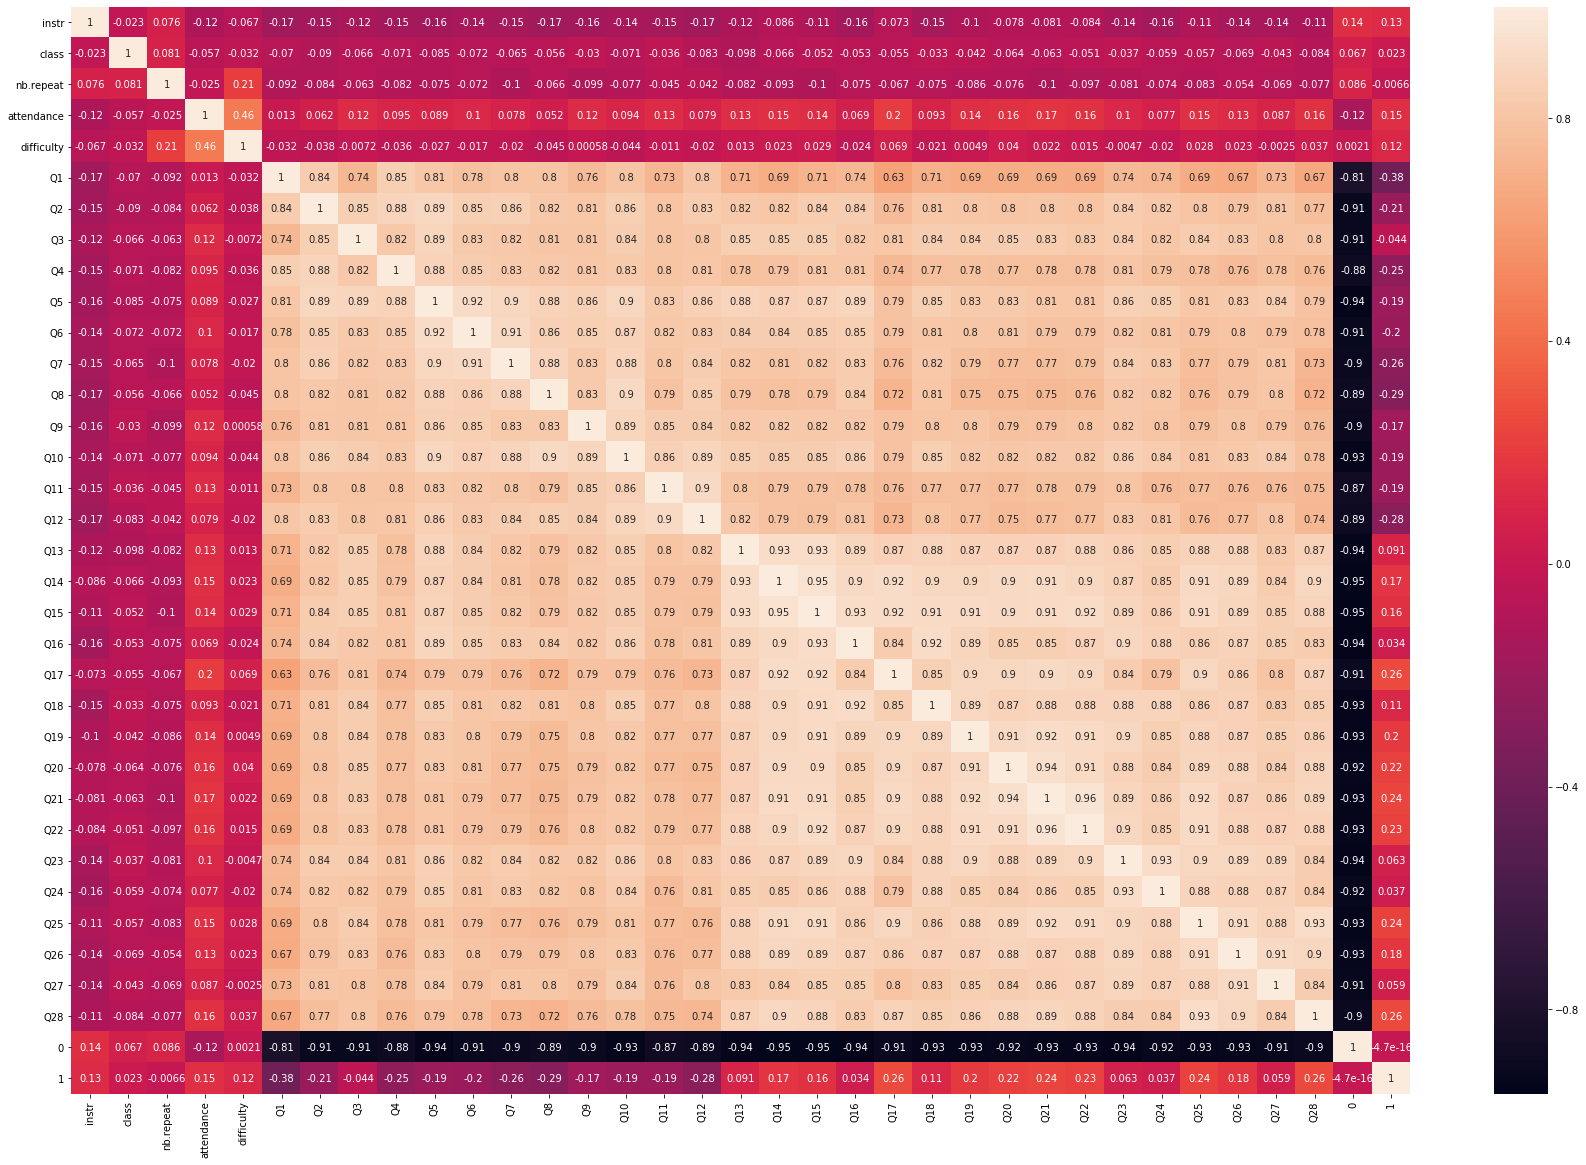

In [103]:
plt.figure(figsize=(30,20))
sns.heatmap(newdata.corr(),annot=True)

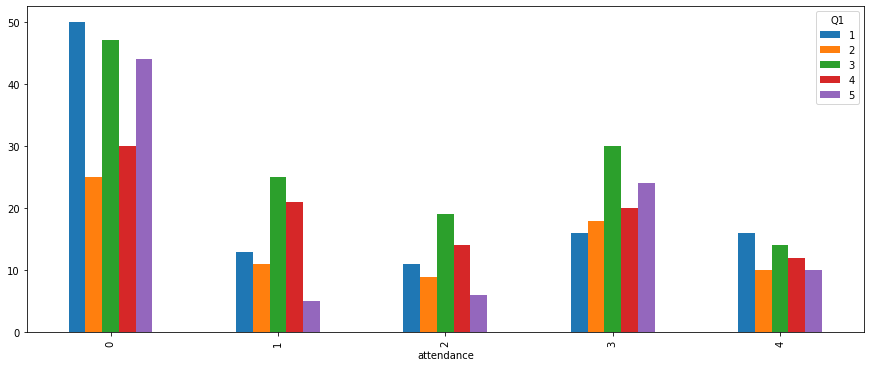

In [149]:
pd.crosstab(data.attendance,data.Q1).plot(kind="bar",figsize=(15,6))

plt.show()

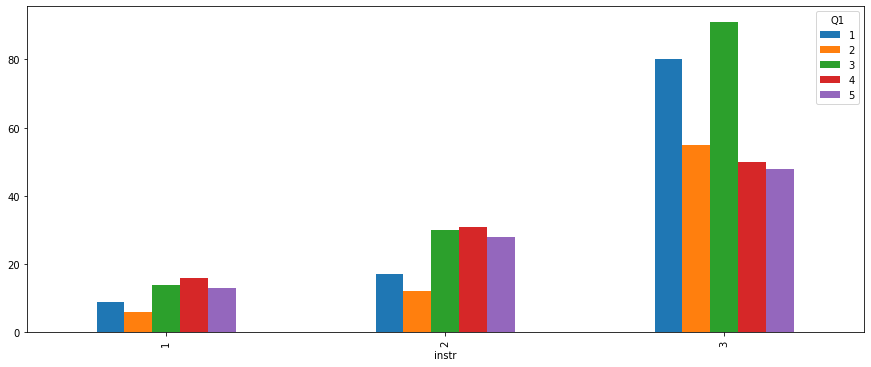

In [150]:
pd.crosstab(data.instr,data.Q1).plot(kind="bar",figsize=(15,6))

plt.show()

In [ ]:
#summary

students who have given negative feedback are
most of the negative feedback are given about initial days of course
for eg:regular students
they have high attendance
they have given negative feedback about beginning of course about evaluation system

hence,rating of trainer and institute can be improved by working on clear communication towards the course content and evaluation system
in the beginning(initial days of course has to be monitored by university)


interpretation of model is as aall the questions are highly correlated
that means each question is related to another question
hence we did pca .....which made features less
and hence according to predictions from feedback recieved trainer can be trained to improve ratings


risk involved is feedback not given appropriately....biased feedback ......feedback given by students who has low attendance
or has not been able to comprehend course material are risk to our model